<a href="https://colab.research.google.com/github/dewangkarays/PLTS/blob/main/Prediksi_PLTS_Tambak_Udang_Jepara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediksi rata rata harian (Output 12 bulan) LSTM (dataset pake yg generate perjam tp grouping 24jam)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.4247 - val_loss: 0.0636
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0718 - val_loss: 0.0463
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0517 - val_loss: 0.0498
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0408 - val_loss: 0.0395
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0387 - val_loss: 0.0414
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0423 - val_loss: 0.0374
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0392 - val_loss: 0.0371
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0386 - val_loss: 0.0519
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0414 - val_loss: 0.0370
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0349 - val_loss: 0.0397
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0402 - val_loss: 0.0428
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

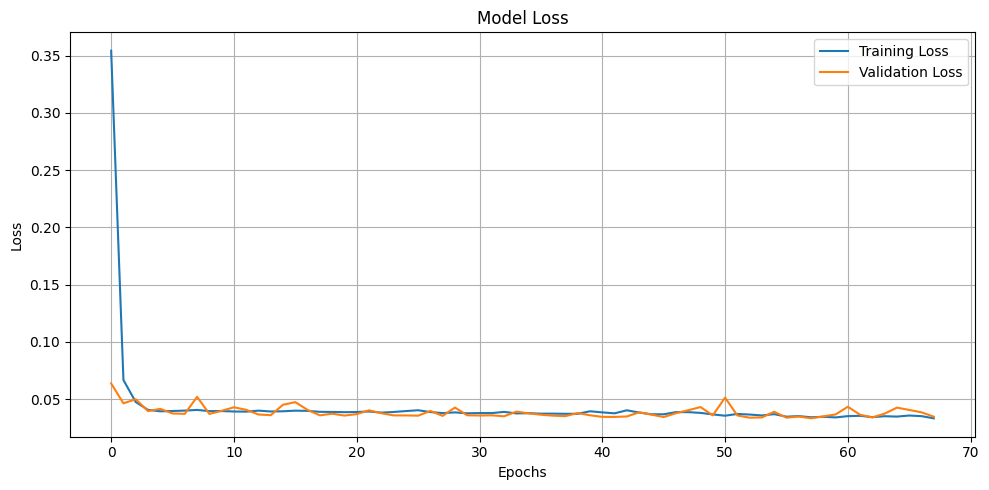

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Evaluation Metrics:
Mean Absolute Error (MAE): 0.70 kWh
Root Mean Squared Error (RMSE): 0.79 kWh
R-squared (R²): 0.83


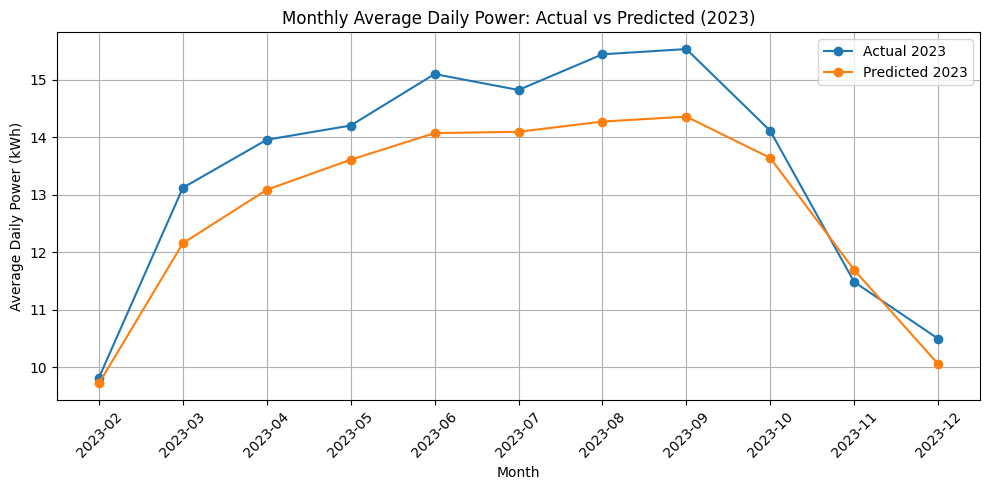

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,905 (1.39 MB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,604 (947.68 KB)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load datasets
file_2021_2022 = '/content/drive/My Drive/datasheet_iradiasi/Data_Jepara_2021_2022_PLTS_kwh.xlsx'
file_2023 = '/content/drive/My Drive/datasheet_iradiasi/data_jepara_plts_real_2023_kwh.xlsx'

data_2021_2022 = pd.read_excel(file_2021_2022, decimal=",")
data_2023 = pd.read_excel(file_2023, decimal=",")

# Rename 'time' column to 'date' for consistency
data_2021_2022.rename(columns={'time': 'date'}, inplace=True)
data_2023.rename(columns={'time': 'date'}, inplace=True)

# Ensure 'date' column is in datetime format
data_2021_2022['date'] = pd.to_datetime(data_2021_2022['date'], errors='coerce')
data_2023['date'] = pd.to_datetime(data_2023['date'], errors='coerce')

# Aggregate hourly data to daily totals for 'Power (kWh)'
data_2021_2022['date_only'] = data_2021_2022['date'].dt.date
data_2023['date_only'] = data_2023['date'].dt.date

data_2021_2022_daily = data_2021_2022.groupby('date_only')['Power (kWh)'].sum().reset_index()
data_2021_2022_daily.columns = ['date', 'daily_power_kwh']

data_2023_daily = data_2023.groupby('date_only')['Power (kWh)'].sum().reset_index()
data_2023_daily.columns = ['date', 'daily_power_kwh']

# Filter data for 'daily_power_kwh' in range [7, 16]
data_2021_2022_daily = data_2021_2022_daily[
    (data_2021_2022_daily['daily_power_kwh'] >= 7) & (data_2021_2022_daily['daily_power_kwh'] <= 16)
]
data_2023_daily = data_2023_daily[
    (data_2023_daily['daily_power_kwh'] >= 7) & (data_2023_daily['daily_power_kwh'] <= 16)
]

# Reset index after filtering
data_2021_2022_daily.reset_index(drop=True, inplace=True)
data_2023_daily.reset_index(drop=True, inplace=True)

# Prepare data for LSTM
scaler = MinMaxScaler()
data_2021_2022_daily['daily_power_kwh'] = scaler.fit_transform(data_2021_2022_daily[['daily_power_kwh']])

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 30
X, y = create_sequences(data_2021_2022_daily['daily_power_kwh'].values, sequence_length)

# Train-test-validation split
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(100, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate on test data
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Predict for 2023
data_2023_daily_scaled = scaler.transform(data_2023_daily['daily_power_kwh'].values.reshape(-1, 1))
X_2023, _ = create_sequences(data_2023_daily_scaled.flatten(), sequence_length)
X_2023 = X_2023.reshape((X_2023.shape[0], X_2023.shape[1], 1))

y_2023_pred = model.predict(X_2023)
y_2023_pred = scaler.inverse_transform(y_2023_pred.reshape(-1, 1))

# Calculate monthly averages for actual and predicted data
data_2023_daily['date'] = pd.to_datetime(data_2023_daily['date'])
monthly_avg_2023_actual = data_2023_daily.groupby(data_2023_daily['date'].dt.to_period('M'))['daily_power_kwh'].mean().reset_index()
monthly_avg_2023_actual.columns = ['month', 'average_daily_power_kwh']

predicted_2023_df = pd.DataFrame({
    'date': data_2023_daily['date'][sequence_length:],
    'predicted_power_kwh': y_2023_pred.flatten()
})
monthly_avg_2023_predicted = predicted_2023_df.groupby(predicted_2023_df['date'].dt.to_period('M'))['predicted_power_kwh'].mean().reset_index()

# Align actual and predicted data by month
monthly_avg_2023_actual.set_index('month', inplace=True)
monthly_avg_2023_predicted.set_index('date', inplace=True)

aligned_data = monthly_avg_2023_actual.join(monthly_avg_2023_predicted, how='inner')

# Evaluate performance
mae = mean_absolute_error(aligned_data['average_daily_power_kwh'], aligned_data['predicted_power_kwh'])
rmse = np.sqrt(mean_squared_error(aligned_data['average_daily_power_kwh'], aligned_data['predicted_power_kwh']))
r2 = r2_score(aligned_data['average_daily_power_kwh'], aligned_data['predicted_power_kwh'])

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} kWh")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} kWh")
print(f"R-squared (R²): {r2:.2f}")

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(aligned_data.index.astype(str), aligned_data['average_daily_power_kwh'], marker='o', label='Actual 2023')
plt.plot(aligned_data.index.astype(str), aligned_data['predicted_power_kwh'], marker='o', label='Predicted 2023')
plt.title('Monthly Average Daily Power: Actual vs Predicted (2023)')
plt.xlabel('Month')
plt.ylabel('Average Daily Power (kWh)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
model.summary()


Prediksi rata rata harian (Output 365 hari) LSTM (dataset harian)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100


<ipython-input-2-ed7970dfb517>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021_2022['daily_power_kwh'] = scaler.fit_transform(data_2021_2022[['daily_power_kwh']])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.3651 - val_loss: 0.1453
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0677 - val_loss: 0.0381
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0435 - val_loss: 0.0424
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0429 - val_loss: 0.0412
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0388 - val_loss: 0.0371
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0393 - val_loss: 0.0383
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0375 - val_loss: 0.0389
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0369 - val_loss: 0.0404
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0356 - val_loss: 0.0359
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0421 - val_loss: 0.0532
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0352 - val_loss: 0.0359
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



2023 Predictions Evaluation Metrics:
Mean Absolute Error (MAE): 1.20
Root Mean Squared Error (RMSE): 1.43
R-squared (R²): 0.58


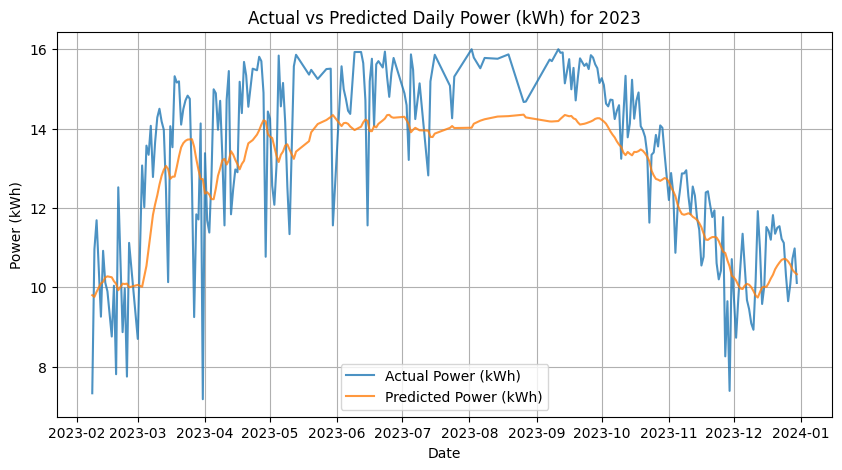

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set file paths
file_2021_2022 = '/content/drive/My Drive/datasheet_iradiasi/2021-2022 harian.xlsx'
file_2023 = '/content/drive/My Drive/datasheet_iradiasi/2023 harian.xlsx'

# Load the datasets
data_2021_2022 = pd.read_excel(file_2021_2022, decimal=",")
data_2023 = pd.read_excel(file_2023, decimal=",")

# Convert 'date' column to datetime
data_2021_2022['date'] = pd.to_datetime(data_2021_2022['date'])
data_2023['date'] = pd.to_datetime(data_2023['date'])

# Filter data for 'daily_power_kwh' in range [7, 16]
data_2021_2022 = data_2021_2022[
    (data_2021_2022['daily_power_kwh'] >= 7) & (data_2021_2022['daily_power_kwh'] <= 16)
]
data_2023 = data_2023[
    (data_2023['daily_power_kwh'] >= 7) & (data_2023['daily_power_kwh'] <= 16)
]

# Reset index after filtering
data_2021_2022.reset_index(drop=True, inplace=True)
data_2023.reset_index(drop=True, inplace=True)

# Scale the target feature
scaler = MinMaxScaler()
data_2021_2022['daily_power_kwh'] = scaler.fit_transform(data_2021_2022[['daily_power_kwh']])

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 30
X, y = create_sequences(data_2021_2022['daily_power_kwh'].values, sequence_length)

# Train-test-validation split
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(100, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on test data
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy metrics for test data
mae_test = mean_absolute_error(y_test_actual, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
r2_test = r2_score(y_test_actual, y_test_pred)

print("Test Data Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

# Predict for 2023
data_2023_scaled = scaler.transform(data_2023['daily_power_kwh'].values.reshape(-1, 1))
X_2023, _ = create_sequences(data_2023_scaled.flatten(), sequence_length)
X_2023 = X_2023.reshape((X_2023.shape[0], X_2023.shape[1], 1))

y_2023_pred = model.predict(X_2023)
y_2023_pred = scaler.inverse_transform(y_2023_pred)

# Calculate accuracy metrics for 2023 predictions
y_2023_actual = scaler.inverse_transform(data_2023_scaled[sequence_length:])
mae_2023 = mean_absolute_error(y_2023_actual, y_2023_pred)
rmse_2023 = np.sqrt(mean_squared_error(y_2023_actual, y_2023_pred))
r2_2023 = r2_score(y_2023_actual, y_2023_pred)

print("\n2023 Predictions Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_2023:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2023:.2f}")
print(f"R-squared (R²): {r2_2023:.2f}")

# Plot Predicted vs Actual for 2023
plt.figure(figsize=(10, 5))
plt.plot(data_2023['date'][sequence_length:], y_2023_actual, label='Actual Power (kWh)', alpha=0.8)
plt.plot(data_2023['date'][sequence_length:], y_2023_pred, label='Predicted Power (kWh)', alpha=0.8)
plt.title('Actual vs Predicted Daily Power (kWh) for 2023')
plt.xlabel('Date')
plt.ylabel('Power (kWh)')
plt.legend()
plt.grid(True)
plt.show()


LSTM Output 12 bulan pakai parameter (dataset perjam di grouping jadi 24 jam)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.4634 - mae: 0.6378 - val_loss: 0.0515 - val_mae: 0.1935
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1032 - mae: 0.2665 - val_loss: 0.1490 - val_mae: 0.3412
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0607 - mae: 0.1891 - val_loss: 0.0332 - val_mae: 0.1437
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0571 - mae: 0.1990 - val_loss: 0.0508 - val_mae: 0.1793
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0450 - mae: 0.1678 - val_loss: 0.0561 - val_mae: 0.1902
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0411 - mae: 0.1628 - val_loss: 0.0377 - val_mae: 0.1494
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0399 - mae: 0.1634 - val_loss: 0.0517 - val_mae: 0.1803
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0339 - mae: 0.1493 - val_loss: 0.0363 - val_mae: 0.1453
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0376 - mae: 0.1557 - val

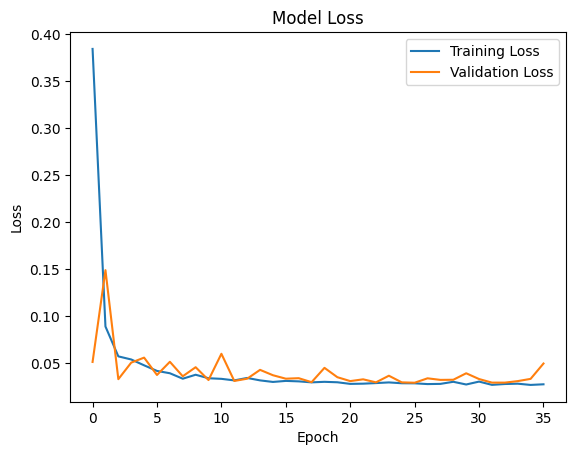

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


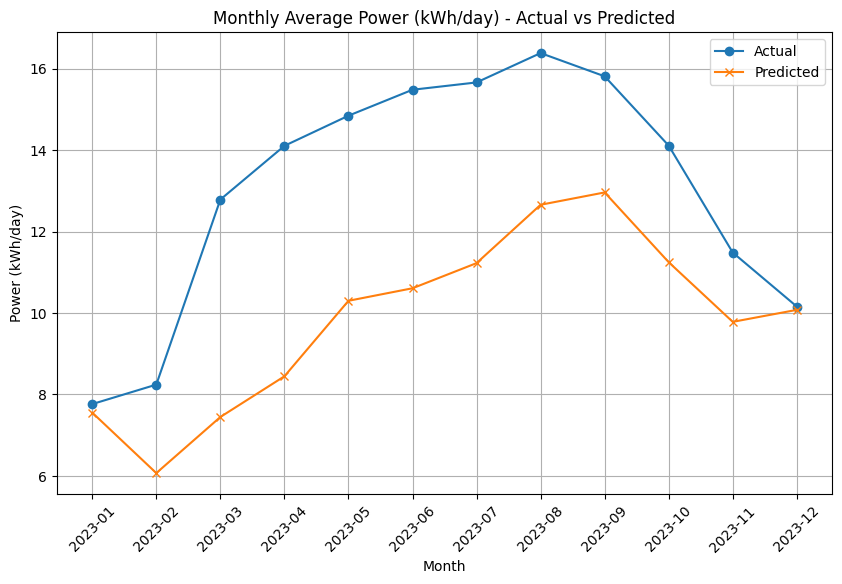

MAE: 3.7085 kWh
RMSE: 4.1977 kWh
R2 Score: -0.7800


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Load datasets from Google Drive
file_2021_2022_kwh = '/content/drive/My Drive/datasheet_iradiasi/Data_Jepara_2021_2022_PLTS_kwh.xlsx'
file_2023_kwh = '/content/drive/My Drive/datasheet_iradiasi/data_jepara_plts_real_2023_kwh.xlsx'

# Load the sheets into DataFrames
data_2021_2022 = pd.read_excel(file_2021_2022_kwh)
data_2023 = pd.read_excel(file_2023_kwh)

# Parse datetime and sort data by time
data_2021_2022['time'] = pd.to_datetime(data_2021_2022['time'])
data_2023['time'] = pd.to_datetime(data_2023['time'])
data_2021_2022 = data_2021_2022.sort_values(by='time')
data_2023 = data_2023.sort_values(by='time')

# Add 'day' column for grouping
data_2021_2022['day'] = data_2021_2022['time'].dt.date
data_2023['day'] = data_2023['time'].dt.date

# Calculate daily total power (kWh)
daily_2021_2022 = data_2021_2022.groupby('day').agg({
    'shortwave_radiation (W/m²)': 'mean',
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'wind_speed_10m (m/s)': 'mean',
    'wind_direction_10m (°)': 'mean',
    'Power (kWh)': 'sum'  # Sum up hourly data to get daily total
}).reset_index()

daily_2023 = data_2023.groupby('day').agg({
    'shortwave_radiation (W/m²)': 'mean',
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'wind_speed_10m (m/s)': 'mean',
    'wind_direction_10m (°)': 'mean',
    'Power (kWh)': 'sum'
}).reset_index()

# Features and target
features = ['shortwave_radiation (W/m²)', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
            'wind_speed_10m (m/s)', 'wind_direction_10m (°)']
target = 'Power (kWh)'

# Normalize the features and target
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaled_features_2021_2022 = scaler_x.fit_transform(daily_2021_2022[features])
scaled_target_2021_2022 = scaler_y.fit_transform(daily_2021_2022[[target]])
scaled_features_2023 = scaler_x.transform(daily_2023[features])
scaled_target_2023 = scaler_y.transform(daily_2023[[target]])

# Prepare data for LSTM with sliding window
def create_sequences(X, y, time_steps=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# Create sequences for LSTM
time_steps = 24  # One day as the time step
X_train_val, y_train_val = create_sequences(scaled_features_2021_2022, scaled_target_2021_2022, time_steps)
X_test, y_test = create_sequences(scaled_features_2023, scaled_target_2023, time_steps)

# Split training and validation data
train_size = int(len(X_train_val) * 0.8)
X_train, X_val = X_train_val[:train_size], X_train_val[train_size:]
y_train, y_val = y_train_val[:train_size], y_train_val[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Predict total daily power
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Predict on test data
predicted_test = model.predict(X_test)

# Rescale predictions and true values back to the original scale
predicted_test_rescaled = scaler_y.inverse_transform(predicted_test)
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Add 'month' column to the predictions and actual data
actual_df = daily_2023.iloc[time_steps:].copy()
predicted_df = actual_df[['day']].copy()
predicted_df['Actual Power (kWh)'] = y_test_rescaled.flatten()
predicted_df['Predicted Power (kWh)'] = predicted_test_rescaled.flatten()
predicted_df['month'] = pd.to_datetime(predicted_df['day']).dt.to_period('M')

# Calculate monthly averages for predicted and actual values
monthly_avg_predicted = predicted_df.groupby('month')['Predicted Power (kWh)'].mean().reset_index()
monthly_avg_actual = predicted_df.groupby('month')['Actual Power (kWh)'].mean().reset_index()

# Convert 'month' to string for plotting
monthly_avg_predicted['month'] = monthly_avg_predicted['month'].astype(str)
monthly_avg_actual['month'] = monthly_avg_actual['month'].astype(str)

# Plot monthly averages
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_actual['month'], monthly_avg_actual['Actual Power (kWh)'], label='Actual', marker='o')
plt.plot(monthly_avg_predicted['month'], monthly_avg_predicted['Predicted Power (kWh)'], label='Predicted', marker='x')
plt.title('Monthly Average Power (kWh/day) - Actual vs Predicted')
plt.xlabel('Month')
plt.ylabel('Power (kWh/day)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Calculate metrics
mae = mean_absolute_error(y_test_rescaled, predicted_test_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predicted_test_rescaled))
r2 = r2_score(y_test_rescaled, predicted_test_rescaled)

print(f"MAE: {mae:.4f} kWh")
print(f"RMSE: {rmse:.4f} kWh")
print(f"R2 Score: {r2:.4f}")

In [47]:
!git status



On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean
